In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from os.path import join as oj
import os
import pygsheets
import pandas as pd
import sys
import inspect
from datetime import datetime, timedelta

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)
sys.path.append(parentdir + '/modeling')
import load_data
from fit_and_predict import add_preds
from functions import merge_data
from viz import  viz_interactive, viz_static
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import plotly.express as px
import plotly

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
print('loading data...')
NUM_DAYS_LIST = [1, 2, 3, 4, 5, 6, 7]
df = load_data.load_county_level(data_dir=oj(parentdir, 'data')).fillna(0)

loading data...
loaded and merged COVID-19 cases/deaths data successfully


# add preds for specific date

In [3]:
import datetime
start = datetime.date(2020, 4, 2)
today = datetime.datetime.today()
end = datetime.date(today.year, today.month, today.day)
delta = (end - start).days

In [4]:
df_past = df.copy()
df_past['deaths'] = df_past['deaths'].map(lambda x: x[:-delta])

In [6]:
df['neighbor_deaths']

KeyError: 'neighbor_deaths'

In [5]:
df_past['deaths'] = add_preds(df_past, NUM_DAYS_LIST=NUM_DAYS_LIST[:2], outcomes=['Deaths'], cached_dir='.')

  0%|          | 0/2 [00:00<?, ?it/s]

predictions not cached, now calculating (might take a while)
predicting Deaths...


ValueError: operands could not be broadcast together with shapes (71,) (93,) (71,) 

In [7]:
d = df_past.head(6)

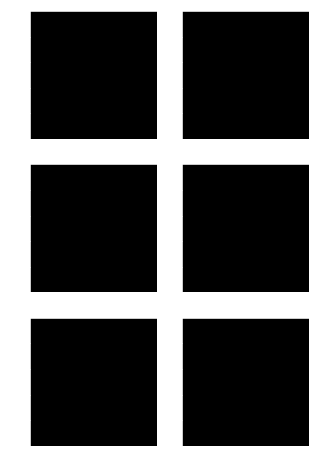

In [8]:
R, C = 3, 2
plt.figure(figsize=(5, 8))
for i in range(R * C):
    plt.subplot(R, C, i + 1)
    plt